In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp

pd.set_option('display.max_columns', None) 

# Merge 

In [3]:
file_path='/content/gdrive/MyDrive/Colab Notebooks/Project/merge_emo/'
files_l=os.listdir(file_path)
df_m=pd.DataFrame()
for i in files_l:
    tmp_df=pd.read_csv(file_path+i)
    df_m=df_m.append(tmp_df)
df_m.reset_index(drop=True,inplace=True)

# Data preprocessing


## result

In [4]:
df_m.rename(columns={'Unnamed: 7':'result'},inplace=True)

def res(item):
    item=re.findall(r'\(.+\)',item)[0][1:-1]
    return item
df_m['result']=df_m['result'].apply(res)

def func(item):
    if item[0]=="+":
        return int(item[1:])
    else:
        return -int(item[1:])
df_m['result']=df_m['result'].apply(func)

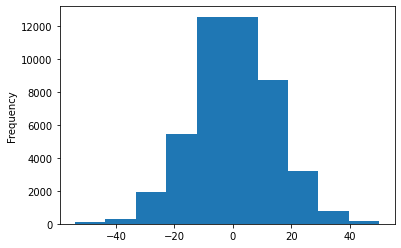

In [5]:
df_m['result'].plot.hist()

In [6]:
df_m['result']=pd.cut(df_m['result'],[-55,0,51],labels=['-1','1'])

In [7]:
df_m['result'].value_counts()

1     23329
-1    22547
Name: result, dtype: int64

## Delete columns with no analytical value.

In [8]:
df_mv1=df_m.drop(['Unnamed: 0','Unnamed: 0.1','Date','tweets','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Rk','G','Unnamed: 5','3P%','FT%'],axis=1)

In [9]:
df_mv1['FG%'].fillna(method='bfill',inplace=True)

In [10]:
df_mv1

,Age,Tm,Opp,result,GS,MP,FG,FGA,FG%,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,emotion
0,22,ATL,BRK,-1,0,19,1,6,0.167,1,6,0,0,1,2,3,3,0,0,1,1,3,1.2,-15.0,0
1,22,ATL,BOS,-1,0,14,1,1,1.000,1,1,0,0,0,2,2,2,0,0,0,3,3,3.5,11.0,1
2,22,GSW,PHI,1,0,8,1,2,0.500,0,0,0,0,1,1,2,2,0,0,2,2,2,0.6,1.0,0
3,22,GSW,CLE,1,1,26,4,7,0.571,0,1,0,0,3,4,7,3,1,0,1,2,8,9.3,3.0,0
4,23,GSW,NYK,1,0,13,1,1,1.000,0,0,1,2,1,0,1,3,0,1,0,0,3,5.8,-4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45871,22,NOP,BRK,-1,1,21,6,10,0.600,3,7,0,0,1,1,2,3,0,0,2,1,15,11.1,-16.0,-1
45872,22,NOP,PHI,-1,0,23,2,6,0.333,1,3,1,2,1,1,2,3,1,0,1,2,6,4.5,-8.0,0
45873,22,NOP,LAC,-1,1,39,7,16,0.438,4,9,0,1,1,9,10,11,2,1,6,3,18,15.8,-4.0,0
45874,23,NOP,HOU,1,1,37,8,18,0.444,8,15,3,3,1,3,4,9,3,0,6,4,27,20.9,4.0,0


# Further processing of data.

In [11]:
#with sentiment
import copy
label=['result']
l_dr=df_mv1.columns.to_list()
for i in copy.deepcopy(l_dr):
  if i in label:
    l_dr.remove(i)
df_dr=df_mv1[l_dr]

#without sentiment
label=['result','emotion']
l_dr_n=df_mv1.columns.to_list()
for i in copy.deepcopy(l_dr_n):
  if i in label:
    l_dr_n.remove(i)
df_dr_n=df_mv1[l_dr_n]

In [12]:
#lable encoder
#with sentiment
lbe=sp.LabelEncoder()
df_dr['Tm']=lbe.fit_transform(df_dr['Tm'])
df_dr['Opp']=lbe.fit_transform(df_dr['Opp'])
df_mv1['result']=lbe.fit_transform(df_mv1['result'])

#without sentiment
df_dr_n['Tm']=lbe.fit_transform(df_dr_n['Tm'])
df_dr_n['Opp']=lbe.fit_transform(df_dr_n['Opp'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [13]:
#with sentiment
for i in l_dr:
  df_dr[i]=df_dr[i].astype('f8')

#without sentiment
for i in l_dr_n:
  df_dr_n[i]=df_dr_n[i].astype('f8')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
#Standardize
#with sentiment
np_std = sp.StandardScaler().fit_transform(df_dr)
df_newdr=pd.DataFrame(np_std)


#without sentiment
np_std_n = sp.StandardScaler().fit_transform(df_dr_n)
df_newdr_n=pd.DataFrame(np_std_n)

# Data partitioning

In [15]:
x,y=df_newdr.loc[:,:],df_mv1['result']

x_n,y_n=df_newdr_n.loc[:,:],df_mv1['result']

In [16]:
import sklearn.model_selection as ms
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.2,random_state=7)

train_x_n,test_x_n,train_y_n,test_y_n=ms.train_test_split(x_n,y_n,test_size=0.2,random_state=7)

# Performance index

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# KNN


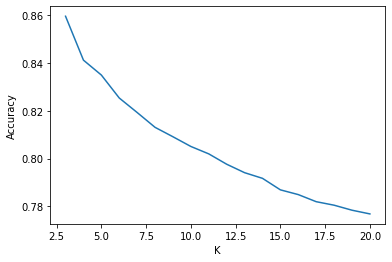

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_range=range(3,21)
cv_scores=[]
for i in k_range:
  knn=KNeighborsClassifier(n_neighbors=i)
  scores=cross_val_score(knn,train_x,train_y,cv=10,scoring='accuracy')
  cv_scores.append(scores.mean())

plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel("Accuracy")
plt.show()

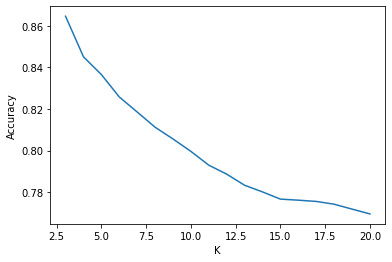

In [ ]:
k_range=range(3,21)
cv_scores_n=[]
for i in k_range:
  knn=KNeighborsClassifier(n_neighbors=i)
  scores=cross_val_score(knn,train_x_n,train_y_n,cv=10,scoring='accuracy')
  cv_scores_n.append(scores.mean())

plt.plot(k_range,cv_scores_n)
plt.xlabel('K')
plt.ylabel("Accuracy")
plt.show()

# Logistical regression

In [ ]:
params=[
    {'penalty':['l2'],'solver':['liblinear','sag','lbfgs']},
    {'penalty':['l1'],'solver':['liblinear']},
]

In [ ]:
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm
lr=GridSearchCV(lm.LogisticRegression(),params,cv=10)
lr.fit(train_x,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l2'],
                          'solver': ['liblinear', 'sag', 'lbfgs']},
                         {'penalty': ['l1'], 'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lr.cv_results_['result'']

[{'penalty': 'l2', 'solver': 'liblinear'},
 {'penalty': 'l2', 'solver': 'sag'},
 {'penalty': 'l2', 'solver': 'lbfgs'},
 {'penalty': 'l1', 'solver': 'liblinear'}]

In [ ]:
lr.cv_results_['mean_test_score']

array([0.7340327 , 0.73395095, 0.73405995, 0.73414169])

In [ ]:
lr.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_n=GridSearchCV(lm.LogisticRegression(),params,cv=10)
lr_n.fit(train_x_n,train_y_n)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l2'],
                          'solver': ['liblinear', 'sag', 'lbfgs']},
                         {'penalty': ['l1'], 'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lr_n.cv_results_['mean_test_score']

array([0.73389646, 0.73389646, 0.73392371, 0.7339782 ])

In [ ]:
lr_n.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
rec_lr_n

[0.27283140184713567,
 0.32671137986805815,
 0.32671137986805815,
 0.2730691712767807]

# SVM

In [ ]:
params=[
    {'kernel':['rbf'],'C':[1,10],'gamma':[0.01,0.05]},
    {'kernel':['sigmoid'],'C':[1,10],'gamma':[0.01,0.05]},
    {'kernel':['linear'],'C':[1,10]}
    ]

In [ ]:
import sklearn.svm as svm
svm_=GridSearchCV(svm.SVC(),params,cv=10)
svm_.fit(train_x,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10], 'gamma': [0.01, 0.05],
                          'kernel': ['rbf']},
                         {'C': [1, 10], 'gamma': [0.01, 0.05],
                          'kernel': ['sigmoid']},
                         {'C': [1, 10], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
svm_.cv_results_['params']

[{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'},
 {'C': 1, 'gamma': 0.05, 'kernel': 'sigmoid'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'},
 {'C': 10, 'gamma': 0.05, 'kernel': 'sigmoid'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'linear'}]

In [ ]:
svm_.cv_results_['mean_test_score']

array([0.75144414, 0.79953678, 0.76376022, 0.85844687, 0.67242507,
       0.61163488, 0.64384196, 0.61125341, 0.73283379, 0.73264305])

In [ ]:
svm_.best_score_

0.8584468664850137

In [ ]:
import sklearn.svm as svm
svm_n=GridSearchCV(svm.SVC(),params,cv=10)
svm_n.fit(train_x_n,train_y_n)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10], 'gamma': [0.01, 0.05],
                          'kernel': ['rbf']},
                         {'C': [1, 10], 'gamma': [0.01, 0.05],
                          'kernel': ['sigmoid']},
                         {'C': [1, 10], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
svm_n.cv_results_['params']

[{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'},
 {'C': 1, 'gamma': 0.05, 'kernel': 'sigmoid'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'},
 {'C': 10, 'gamma': 0.05, 'kernel': 'sigmoid'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'linear'}]

In [ ]:
svm_n.cv_results_['mean_test_score']

array([0.75201635, 0.80035422, 0.76346049, 0.85986376, 0.65978202,
       0.6066485 , 0.64487738, 0.60591281, 0.73307902, 0.73307902])

## Decision Tree

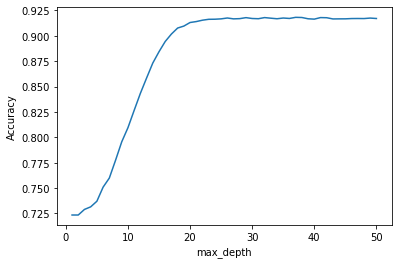

In [ ]:
from sklearn.tree import DecisionTreeClassifier

maxdep_range=range(1,51)
cv_scores=[]
for i in maxdep_range:
  dt=DecisionTreeClassifier(max_depth=i)
  scores=cross_val_score(dt,train_x,train_y,cv=10,scoring='accuracy')
  cv_scores.append(scores.mean())

plt.plot(maxdep_range,cv_scores)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.show()

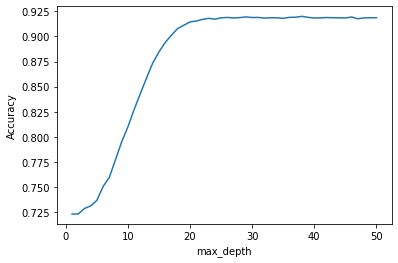

In [ ]:
maxdep_range=range(1,51)
cv_scores_n=[]
for i in maxdep_range:
  dt=DecisionTreeClassifier(max_depth=i)
  scores=cross_val_score(dt,train_x_n,train_y_n,cv=10,scoring='accuracy')
  cv_scores_n.append(scores.mean())

plt.plot(maxdep_range,cv_scores_n)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.show()

# GDBT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
maxdep_range=range(1,31)
cv_scores=[]
for i in maxdep_range:
  gbdt = GradientBoostingClassifier(learning_rate=0.03,max_depth=i)
  scores=cross_val_score(gbdt,train_x,train_y,cv=10,scoring='accuracy')
  cv_scores.append(scores.mean())

plt.plot(maxdep_range,cv_scores)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.show()

In [ ]:
maxdep_range=range(1,31)
cv_scores_n=[]
for i in maxdep_range:
  gbdt = GradientBoostingClassifier(learning_rate=0.03,max_depth=i)
  scores=cross_val_score(gbdt,train_x_n,train_y_n,cv=10,scoring='accuracy')
  cv_scores_n.append(scores.mean())

plt.plot(maxdep_range,cv_scores_n)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.show()

# XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
params=[{'learning_rate':[0.1,0.03],'gamma':[0.1,0.3,0.5],'max_depth':[5,10,15],'n_estimators':[30,50]}
]

In [ ]:
xgb=GridSearchCV(XGBClassifier(),params,cv=10)
xgb.fit(train_x,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'gamma': [0.1, 0.3, 0.5],
                          'learning_rate': [0.1, 0.03], 'max_depth': [5, 10],
                          'n_estimators': [30,

In [ ]:
xgb.cv_results_['params']

[{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 50},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 50},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50},
 {'gamma': 0.3, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.3

In [ ]:
xgb.cv_results_['mean_test_score']

array([0.76896458, 0.78787466, 0.89411444, 0.90618529, 0.75138965,
       0.75708447, 0.86457766, 0.87953678, 0.76896458, 0.78716621,
       0.89405995, 0.90564033, 0.75138965, 0.75697548, 0.86550409,
       0.87847411, 0.7686921 , 0.78594005, 0.89441417, 0.90697548,
       0.75138965, 0.75697548, 0.86425068, 0.87950954])

In [ ]:
xgb_n=GridSearchCV(XGBClassifier(),params,cv=10)
xgb_n.fit(train_x_n,train_y_n)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'gamma': [0.1, 0.3, 0.5],
                          'learning_rate': [0.1, 0.03], 'max_depth': [5, 10],
                          'n_estimators': [30,

In [ ]:
xgb_n.cv_results_['params']

[{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 50},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 30},
 {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 50},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30},
 {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50},
 {'gamma': 0.3, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 30},
 {'gamma': 0.3

In [ ]:
xgb_n.cv_results_['mean_test_score']

array([0.76896458, 0.78768392, 0.89504087, 0.9073842 , 0.75138965,
       0.75708447, 0.8646594 , 0.87929155, 0.76896458, 0.78694823,
       0.89365123, 0.90536785, 0.75138965, 0.75697548, 0.8652861 ,
       0.87910082, 0.7686921 , 0.78689373, 0.89493188, 0.90752044,
       0.75138965, 0.75697548, 0.86411444, 0.87959128])

# Evaluation

In [18]:
import time

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
start=time.time()
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)
end=time.time()
pred_y=knn.predict(test_x)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y,pred_y),recall_score(test_y,pred_y),f1_score(test_y,pred_y),end-start))

accuracy:0.8720575414123801,recall:0.8823402882340288,f1:0.8748133930475581,time:1.2237515449523926


In [ ]:
start=time.time()
knn_n=KNeighborsClassifier(n_neighbors=3)
knn_n.fit(train_x_n,train_y_n)
end=time.time()
pred_y_n=knn_n.predict(test_x_n)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y_n,pred_y_n),recall_score(test_y_n,pred_y_n),f1_score(test_y_n,pred_y_n),end-start))

accuracy:0.877615518744551,recall:0.8881479888147988,f1:0.8802899477667626,time:1.2168405055999756


## Logistic regression

In [ ]:
import sklearn.linear_model as lm

In [ ]:
start=time.time()
lr=lm.LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(train_x,train_y)
end=time.time()
pred_y=lr.predict(test_x)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y,pred_y),recall_score(test_y,pred_y),f1_score(test_y,pred_y),end-start))

accuracy:0.7345248474280732,recall:0.7461819746181975,f1:0.7401322807766163,time:2.4118282794952393


In [ ]:
start=time.time()
lr_n=lm.LogisticRegression(penalty='l1',solver='liblinear')
lr_n.fit(train_x_n,train_y_n)
end=time.time()
pred_y_n=lr_n.predict(test_x_n)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y_n,pred_y_n),recall_score(test_y_n,pred_y_n),f1_score(test_y_n,pred_y_n),end-start))

accuracy:0.7349607672188317,recall:0.7468272746827275,f1:0.7406143344709899,time:2.5034782886505127


## SVM

In [ ]:
import sklearn.svm as svm
start=time.time()
svm_=svm.SVC(C=10,gamma=0.05,kernel='rbf')
svm_.fit(train_x,train_y)
end=time.time()
pred_y=svm_.predict(test_x)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y,pred_y),recall_score(test_y,pred_y),f1_score(test_y,pred_y),end-start))

accuracy:0.8699869224062773,recall:0.8773929877392987,f1:0.8724200620254517,time:244.45630025863647


In [ ]:
start=time.time()
svm_n=svm.SVC(C=10,gamma=0.05,kernel='rbf')
svm_n.fit(train_x_n,train_y_n)
end=time.time()
pred_y_n=svm_n.predict(test_x_n)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y_n,pred_y_n),recall_score(test_y_n,pred_y_n),f1_score(test_y_n,pred_y_n),end-start))

accuracy:0.8745640802092415,recall:0.8814798881479888,f1:0.8768588852038087,time:203.55415153503418


## XGBoost

In [19]:
from xgboost.sklearn import XGBClassifier

In [20]:
start=time.time()
xgb=XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=50,gamma=0.5)
xgb.fit(train_x,train_y)
end=time.time()
pred_y=xgb.predict(test_x)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y,pred_y),recall_score(test_y,pred_y),f1_score(test_y,pred_y),end-start))

accuracy:0.9106364428945074,recall:0.9163260916326091,f1:0.9122055674518201,time:6.325353145599365


In [21]:
start=time.time()
xgb_n=XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=50,gamma=0.5)
xgb_n.fit(train_x_n,train_y_n)
end=time.time()
pred_y_n=xgb_n.predict(test_x_n)
print('accuracy:{},recall:{},f1:{},time:{}'.format(accuracy_score(test_y_n,pred_y_n),recall_score(test_y_n,pred_y_n),f1_score(test_y_n,pred_y_n),end-start))

accuracy:0.9118352223190933,recall:0.9178317917831792,f1:0.9134111099218666,time:6.094282865524292


## Line plot

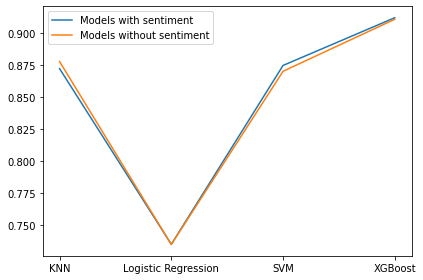

In [ ]:
acc_with_emo=[0.87206,0.73485,0.87456,0.91183]
acc_without_emo=[0.87762,0.73474,0.86999,0.91064]
plt.plot(['KNN','Logistic Regression','SVM','XGBoost'],acc_with_emo,label='Models with sentiment')
plt.plot(['KNN','Logistic Regression','SVM','XGBoost'],acc_without_emo,label='Models without sentiment')
plt.legend()
plt.tight_layout()
plt.show()

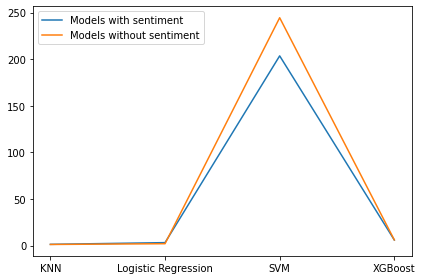

In [ ]:
time_with_emo=[1.40317,3.24802,203.55415,6.06649]
time_without_emo=[1.28298,2.10319,244.4563,6.1866]
plt.plot(['KNN','Logistic Regression','SVM','XGBoost'],time_with_emo,label='Models with sentiment')
plt.plot(['KNN','Logistic Regression','SVM','XGBoost'],time_without_emo,label='Models without sentiment')
plt.legend()
plt.tight_layout()
plt.show()